<a href="https://colab.research.google.com/github/sjcorp/notebooks/blob/master/ml_fundamentals/ml_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Files from Google Drive or Github Directly

In [2]:
## Import Files from Google Drive OR GitHub

# From Google Drive
gdurltitanic = 'https://drive.google.com/file/d/15tUbXaTIktuLzNjTq6euUHqBpGNuz7u6/view?usp=sharing'
gdtitanic = 'https://drive.google.com/uc?export=download&id='+gdurltitanic.split('/')[-2]

# From GitHub
githousing = 'https://raw.githubusercontent.com/sjcorp/notebooks/master/datasets/housing/train.csv'

# Import Libraries

In [3]:
# Import Primary Libraries
import sys
import scipy
import sklearn
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load Visualization Libraries
from pandas.plotting import scatter_matrix

# Load Data Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Load Data Evaluation Libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load, Analyze & Visualize Data

In [4]:
# Load Data
df = pd.read_csv(githousing)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Load Data
dataset = sns.load_dataset('iris')

NameError: name 'sns' is not defined

In [6]:
# Analyze Data
print(dataset.shape) # Number of Row & Columns
print(dataset.head) # Top 5 & Bottom 5 Rows
print(dataset.describe()) # Statistical Summary
print(dataset.groupby('species').size()) # Distribution of the dependent variable in the given dataset

NameError: name 'dataset' is not defined

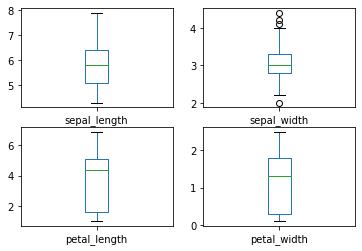

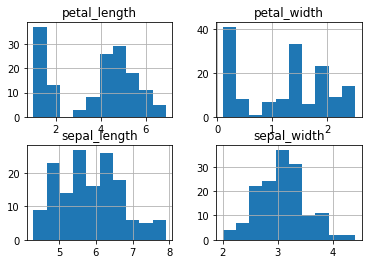

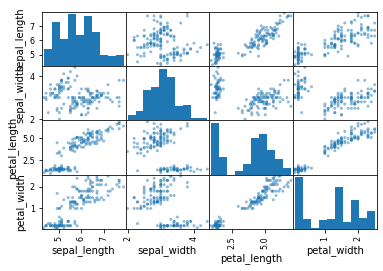

In [ ]:
# Visualize Data
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False) # box and whisker plots
plt.show()
dataset.hist() # histograms
plt.show()
scatter_matrix(dataset) # scatter plot matrix
plt.show()

# Prepare Data

In [ ]:
# Separate Feature & Response Variable; split them into test and train data
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Run & Compare Algorithms

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.038188)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


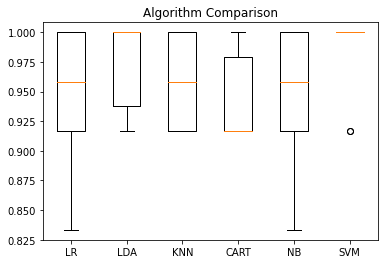

In [ ]:
# LList Algorithms to Compare
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))) # Used for binary output
models.append(('LDA', LinearDiscriminantAnalysis())) # 
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Train Algorithms
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 
# Evaluate Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Make Prediction Using Selected Algorithm

In [ ]:
# Make Predictions
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

